In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) # So we can see all columns
pd.set_option('display.max_rows',200)
import utility_functions

In [2]:
df = pd.read_csv("D:/Banque Misr Internship/Loan Datasets/imputed_dataset.csv")

In [3]:
import importlib
importlib.reload(utility_functions)

<module 'utility_functions' from 'd:\\Banque Misr Internship\\loan-defaulter-prediction\\Final Notebooks\\utility_functions.py'>

In [4]:
X_train_res,X_val,y_train_res,y_val,X_test,y_test = utility_functions.setup_model(df)

Initialize the XGBoost model

In [5]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=150,  # Number of boosting rounds
    max_depth=6,       # Maximum depth of a tree
    learning_rate=0.1, # Step size shrinkage used in update to prevent overfitting
    subsample=0.8,     # Subsample ratio of the training instance
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42,   # Random seed for reproducibility
    use_label_encoder=False  # Prevent deprecation warning in XGBoost 1.3+
)


Train the model

In [11]:
xgb_model.fit(X_train_res, y_train_res, 
              eval_set=[(X_val, y_val)],   
              verbose=True,
                )
y_train_xg = xgb_model.predict(X_train_res)
train_accuracy = accuracy_score(y_train_res, y_train_xg)
f1_accuracy = f1_score(y_train_res, y_train_xg)
print(train_accuracy)

[0]	validation_0-logloss:0.64740
[1]	validation_0-logloss:0.60480
[2]	validation_0-logloss:0.56791


C:\Users\mdamr\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [01:36:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation_0-logloss:0.54086
[4]	validation_0-logloss:0.51651
[5]	validation_0-logloss:0.49055
[6]	validation_0-logloss:0.46906
[7]	validation_0-logloss:0.44495
[8]	validation_0-logloss:0.42757
[9]	validation_0-logloss:0.40959
[10]	validation_0-logloss:0.39454
[11]	validation_0-logloss:0.38058
[12]	validation_0-logloss:0.36499
[13]	validation_0-logloss:0.35563
[14]	validation_0-logloss:0.34245
[15]	validation_0-logloss:0.33085
[16]	validation_0-logloss:0.32013
[17]	validation_0-logloss:0.31341
[18]	validation_0-logloss:0.30265
[19]	validation_0-logloss:0.29382
[20]	validation_0-logloss:0.28621
[21]	validation_0-logloss:0.27977
[22]	validation_0-logloss:0.27001
[23]	validation_0-logloss:0.26606
[24]	validation_0-logloss:0.25904
[25]	validation_0-logloss:0.25338
[26]	validation_0-logloss:0.24904
[27]	validation_0-logloss:0.24415
[28]	validation_0-logloss:0.24032
[29]	validation_0-logloss:0.23619
[30]	validation_0-logloss:0.23360
[31]	validation_0-logloss:0.22932
[32]	validation_0-log

In [12]:
print(f1_accuracy)

0.9516496018202503


In [7]:
y_pred_val = xgb_model.predict(X_val)
y_pred_proba_val = xgb_model.predict_proba(X_val)[:, 1]

Calculate metrics

In [8]:
utility_functions.calculate_metrics(y_val,y_pred_val)

Accuracy: 0.9534
F1 Score: 0.9503
ROC-AUC Score: 0.9526
Precision: 0.998408
Recall:  0.906585


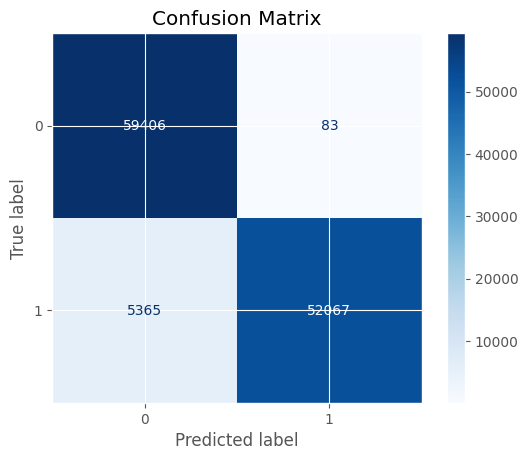

In [9]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()